In [44]:
import sys
import os
import numpy as np
# Add the root directory of the package to sys.path
sys.path.append('/Users/user/PythonProjects/SpyDust/')

from SpyDust.SPDUST_as_is.charge_dist import *
from SpyDust.SPDUST_as_is.emissivity import *
import matplotlib.pyplot as plt


## Consistency of the subroutines

In [45]:
from SpyDust.utils.util import *
from SpyDust.SPDUST_as_is.grain_properties import *
from SpyDust.SPDUST_as_is.emissivity import *

In [46]:
# See DL98b table I for the parameters

# nh: number density of hydrogen atoms in cm^-3
# T: temperature in K
# Chi: intensity of the radiation field relative to the average interstelar radiation field
# xh: hydrogen ionization fraction
# xC: ionized carbon fractional abundance
# y: molecular hydrogen fractional abundance
# gamma: H2 formation efficiency
# dipole: rms dipole moment for dust grains in Debye 
# line: parameters for the grain size distribution : provide the corresponding line of table 1 of Weingartner
# & Draine (2001b) (starting at one) under the tag line

DC_params = {'nh' : 1e4, 'T': 10., 'Chi': 1e-4, 'xh': 0., 'xC': 1e-6, 'y' : 0.999,  'gamma': 0, 'dipole': 9.3, 'line':7}

MC_params = {'nh' : 3e2, 'T': 20., 'Chi': 1e-2, 'xh': 0., 'xC': 1e-4, 'y' : 0.99,  'gamma': 0, 'dipole': 9.3, 'line':7}    

CNM_params = {'nh' : 30, 'T': 100., 'Chi': 1, 'xh': 1.2e-3, 'xC': 3e-4, 'y' : 0, 'gamma': 0, 'dipole': 9.3, 'line':7}

WNM_params = {'nh' : 0.4, 'T': 6000., 'Chi': 1., 'xh': 0.1, 'xC': 3e-4, 'y' : 0, 'gamma': 0, 'dipole': 9.3, 'line':7}

WIM_params = {'nh' : 0.1, 'T': 8000., 'Chi': 1., 'xh': 0.99, 'xC': 1e-3, 'y' : 0, 'gamma': 0, 'dipole': 9.3, 'line':7}

RN_params = {'nh' : 1000., 'T': 100., 'Chi': 1000., 'xh': 0.001, 'xC': 2e-4, 'y' : 0.5, 'gamma': 0, 'dipole': 9.3, 'line':7}

PDR_params = {'nh' : 1e5, 'T': 300., 'Chi': 3000., 'xh': 0.0001, 'xC': 2e-4, 'y' : 0.5, 'gamma': 0, 'dipole': 9.3, 'line':7}

### Inputs for the IDL SPDUST

DC_params = {nh : 1d4, T: 10d, chi: 1d-4, xh: 0d, xc: 1d-6, y : 0.999d, gamma: 0d, dipole: 9.3d, line:7}

MC_params = {nh : 3d2, T: 20d, chi: 1d-2, xh: 0d, xc: 1d-4, y : 0.99d, gamma: 0d, dipole: 9.3d, line:7}

CNM_params = {nh : 30d, T: 1d2, chi: 1d, xh: 1.2d-3, xc: 3d-4, y : 0d, gamma: 0d, dipole: 9.3d, line:7}

WNM_params = {nh : 0.4d, T: 6d3, chi: 1d, xh: 0.1d, xc: 3d-4, y : 0d, gamma: 0d, dipole: 9.3d, line:7}

WIM_params = {nh : 0.1d, T: 8d3, chi: 1d, xh: 0.99d, xc: 1d-3, y : 0d, gamma: 0d, dipole: 9.3d, line:7}

RN_params = {nh : 1d3, T: 1d2, chi: 1d3, xh: 1d-3, xc: 2d-4, y : 0.5d, gamma: 0d, dipole: 9.3d, line:7}

PDR_params = {nh : 1d5, T: 3d2, chi: 3d3, xh: 1d-4, xc: 2d-4, y : 0.5d, gamma: 0d, dipole: 9.3d, line:7}

SPDUST, DC_params, '/Users/user/DC_emiss.out', /case1, min_freq = 1d, max_freq = 300d, N_freq = 500

In [47]:
from SpyDust.SPDUST_as_is.spdust import SPDUST

In [48]:
result_DC = SPDUST(DC_params, min_freq = 1, max_freq=300, n_freq=500, tumbling=False)
result_MC = SPDUST(MC_params, min_freq = 1, max_freq=300, n_freq=500, tumbling=False)
result_CNM = SPDUST(CNM_params, min_freq = 1, max_freq=300, n_freq=500)
result_WNM = SPDUST(WNM_params, min_freq = 1, max_freq=300, n_freq=500)
result_WIM = SPDUST(WIM_params, min_freq = 1, max_freq=300, n_freq=500)
result_RN = SPDUST(RN_params, min_freq = 1, max_freq=300, n_freq=500)
result_PDR = SPDUST(PDR_params, min_freq = 1, max_freq=300, n_freq=500)

mu(1E-7 cm) = 9.3 debye (beta = 0.3845076772265463 debye)
Assuming that disklike grains spin around their axis of greatest inertia
mu(1E-7 cm) = 9.3 debye (beta = 0.3845076772265463 debye)
Assuming that disklike grains spin around their axis of greatest inertia
mu(1E-7 cm) = 9.3 debye (beta = 0.3845076772265463 debye)
mu(1E-7 cm) = 9.3 debye (beta = 0.3845076772265463 debye)
mu(1E-7 cm) = 9.3 debye (beta = 0.3845076772265463 debye)
mu(1E-7 cm) = 9.3 debye (beta = 0.3845076772265463 debye)
mu(1E-7 cm) = 9.3 debye (beta = 0.3845076772265463 debye)


In [49]:
# Import the IDL results for comparison 
# From IDL outputs
idl_result_DC = np.loadtxt('IDL_outputs/DC_emiss.out', comments=';')
idl_result_MC = np.loadtxt('IDL_outputs/MC_emiss.out', comments=';')
idl_result_CNM = np.loadtxt('IDL_outputs/CNM_emiss.out', comments=';')
idl_result_WNM = np.loadtxt('IDL_outputs/WNM_emiss.out', comments=';')
idl_result_WIM = np.loadtxt('IDL_outputs/WIM_emiss.out', comments=';')
idl_result_RN = np.loadtxt('IDL_outputs/RN_emiss.out', comments=';')
idl_result_PDR = np.loadtxt('IDL_outputs/PDR_emiss.out', comments=';')

In [50]:
python_results = [ result_DC, result_MC,
                    result_CNM, result_WNM, result_WIM, result_RN, result_PDR]
idl_results = [ idl_result_DC, idl_result_MC,
                idl_result_CNM, idl_result_WNM, idl_result_WIM, idl_result_RN, idl_result_PDR]
ISM_list = [ 'DC', 'MC', 'CNM', 'WNM', 'WIM', 'RN', 'PDR']

In [51]:
spy_color1, spy_color2, spdust_color1, spdust_color2=['#9ED17B', '#367DB0', '#A8ACCB', '#AC8AB3']

In [56]:
def plot_emissivity(env_ind, ax, plot_xlabel=False, plot_ylabel=False, labels=True):
    title=ISM_list[env_ind]
    if labels:
        ax.loglog(idl_results[env_ind][:,0], idl_results[env_ind][:,1], label='IDL', lw=3, linestyle='-', color=spy_color2)
        ax.loglog(python_results[env_ind][0,:], python_results[env_ind][1,:], label='Python', lw=3, linestyle='--', color=spy_color1)
        ax.loglog(python_results[env_ind][0,:], np.abs(python_results[env_ind][1,:]-idl_results[env_ind][:,1]), label='|Python - IDL|', linestyle=':', color='gray')
    else:
        ax.loglog(idl_results[env_ind][:,0], idl_results[env_ind][:,1], lw=3, linestyle='-', color=spy_color2)
        ax.loglog(python_results[env_ind][0,:], python_results[env_ind][1,:], lw=3, linestyle='--', color=spy_color1)
        ax.loglog(python_results[env_ind][0,:], np.abs(python_results[env_ind][1,:]-idl_results[env_ind][:,1]), linestyle=':', color='gray')
    ax.set_title(title, fontsize=13)
    ax.legend(fontsize=11, frameon=False)
    ax.set_xlim(1, 300)
    ax.set_ylim(5e-26, 5e-15)
    # Set stick label size
    if plot_xlabel:
        ax.set_xlabel(r'$\nu$ [GHz]', fontsize=12)
    else:
        ax.set_xticklabels([])
    if plot_ylabel:
        ax.set_ylabel(r'$j_{\nu}/n_H$', fontsize=12)
    else:
        ax.set_yticklabels([])
    ax.tick_params(axis='both', which='major', labelsize=12)

/var/folders/n6/tr4cmwxn5436s2wl6n6vtj240000gp/T/ipykernel_16996/2244617646.py:28: RuntimeWarning: invalid value encountered in divide
  ys = np.abs(python_results[i][1,:]-idl_results[i][:,1]) / idl_results[i][:,1]


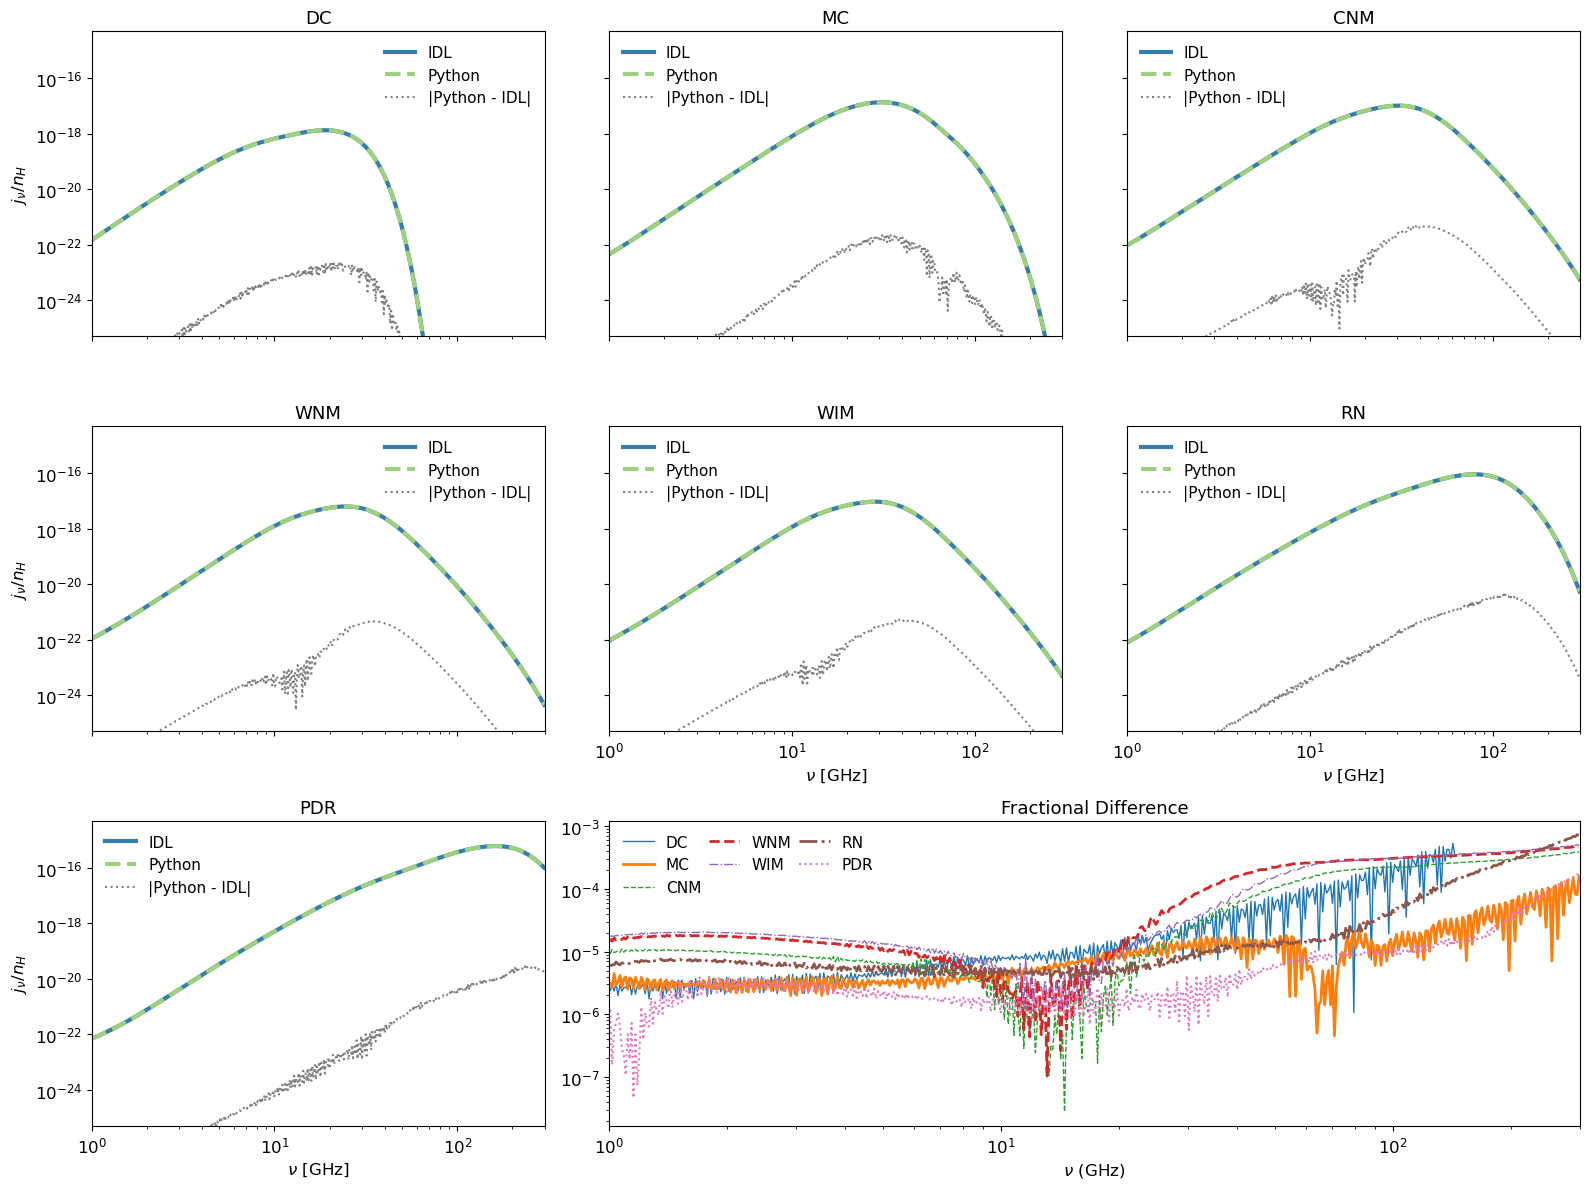

In [60]:
# Create a figure with a 3x3 grid
fig = plt.figure(figsize=(16, 12))
gs = fig.add_gridspec(3, 3)
axs = [fig.add_subplot(gs[0, 0]), fig.add_subplot(gs[0, 1]), fig.add_subplot(gs[0, 2]),
       fig.add_subplot(gs[1, 0]), fig.add_subplot(gs[1, 1]), fig.add_subplot(gs[1, 2]),
       fig.add_subplot(gs[2, 0]), fig.add_subplot(gs[2, 1:])]

plot_emissivity(0, axs[0], plot_ylabel=True)
plot_emissivity(1, axs[1])
plot_emissivity(2, axs[2])
plot_emissivity(3, axs[3], plot_ylabel=True)
plot_emissivity(4, axs[4], plot_xlabel=True)
plot_emissivity(5, axs[5], plot_xlabel=True)
plot_emissivity(6, axs[6], plot_xlabel=True, plot_ylabel=True)

line_styles = [
    ('-', 1),    # Solid line, thin
    ('-', 2),    # Solid line, thick
    ('--', 1),   # Dashed line, thin
    ('--', 2),   # Dashed line, thick
    ('-.', 1),   # Dash-dot line, thin
    ('-.', 2),   # Dash-dot line, thick
    (':', 1.5)   # Dotted line, medium thickness
]

for i in range(7):
    style, width = line_styles[i]
    ys = np.abs(python_results[i][1,:]-idl_results[i][:,1]) / idl_results[i][:,1]
    axs[7].loglog(python_results[i][0], ys, label=ISM_list[i], linestyle=style, linewidth=width)

axs[7].set_xlabel(r'$\nu$ (GHz)', fontsize=12)
axs[7].set_title('Fractional Difference', fontsize=13)
axs[7].set_xlim(1, 300)
axs[7].tick_params(axis='both', which='major', labelsize=12)
axs[7].legend(fontsize=11, frameon=False, columnspacing=0.5, loc='upper left', ncol=3)
plt.tight_layout()
plt.savefig('figures/spdust_comparison.pdf' , bbox_inches='tight')